<a href="https://colab.research.google.com/github/Priyabrat845/Topic-Modeling-on-News-Articles/blob/main/Topic_modeling_of_news_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import glob

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


#Eimport pyLDAvis.sklearn
#pyLDAvis.enable_notebook()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **Import Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ="/content/drive/MyDrive/Almabetter/bbc"

In [ ]:
#Importing text file paths
business = glob.glob(path+'/business/*')
entertainment = glob.glob(path+'/entertainment/*')
politics = glob.glob(path+'/politics/*')
sports = glob.glob(path+'/sport/*')
tech = glob.glob(path+'/tech/*')

In [ ]:
business[0:5]

['/content/drive/MyDrive/Almabetter/bbc/business/003.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/001.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/002.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/024.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/004.txt']

In [ ]:
len(sports)

511

In [ ]:
sports_text=[]
try:
  for i in range(len(sports)):
    f=open(sports[i],errors='ignore')
    a=f.read()
    sports_text.append(a)
except:
  print('List ended !!')


In [ ]:
len(sports_text)

511

In [ ]:
sports_text

['Dibaba breaks 5,000m world record\n\nEthiopia\'s Tirunesh Dibaba set a new world record in winning the women\'s 5,000m at the Boston Indoor Games.\n\nDibaba won in 14 minutes 32.93 seconds to erase the previous world indoor mark of 14:39.29 set by another Ethiopian, Berhane Adera, in Stuttgart last year. But compatriot Kenenisa Bekele\'s record hopes were dashed when he miscounted his laps in the men\'s 3,000m and staged his sprint finish a lap too soon. Ireland\'s Alistair Cragg won in 7:39.89 as Bekele battled to second in 7:41.42. "I didn\'t want to sit back and get out-kicked," said Cragg. "So I kept on the pace. The plan was to go with 500m to go no matter what, but when Bekele made the mistake that was it. The race was mine." Sweden\'s Carolina Kluft, the Olympic heptathlon champion, and Slovenia\'s Jolanda Ceplak had winning performances, too. Kluft took the long jump at 6.63m, while Ceplak easily won the women\'s 800m in 2:01.52.\n',
 "2004: An Irish Athletics Year\n\n2004 wo

In [ ]:
def make_list(data):
    list = []
    for i in range(len(data)):
      file = open(data[i],'r')
      list.append(file.read())
    return(list)

In [ ]:
len(business)

510

In [ ]:
business_texts= make_list(business)
entertainment_text = make_list(entertainment)
politics_texts= make_list(politics)
#sport_texts= make_list(sports)
tech_text = make_list(tech)

In [ ]:
#Number of documents in every topics
print(len(business_texts),len(entertainment_text),len(politics_texts),len(sports_text),len(tech_text))

510 386 417 511 401


In [ ]:
complete_text = business_texts + entertainment_text + politics_texts + sports_text + tech_text

In [ ]:
len(complete_text)

2225

In [ ]:
!pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.7/dist-packages (3.0.0)


In [ ]:
data = pd.DataFrame({'Texts': complete_text})
#data.head()

In [ ]:
len(data)

2225

In [ ]:
data.head(5)

,Texts
0,Yukos unit buyer faces loan claim\n\nThe owner...
1,Ad sales boost Time Warner profit\n\nQuarterly...
2,Dollar gains on Greenspan speech\n\nThe dollar...
3,US trade gap hits record in 2004\n\nThe gap be...
4,High fuel prices hit BA's profits\n\nBritish A...


In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#Data Cleaning 
def text_processing(data):
  data = data.map(lambda x: x.replace('\n',' '))
  data = data.map(lambda x: x.lower())
  #data = data.map(lambda x: ''.join([i for i in x if i not in string.punctuation]))
  data = data.map(lambda x: ' '.join([i for i in x.split(' ') if i not in stopwords.words('english')]))
  return data

In [ ]:
data['Texts']= text_processing(data['Texts'])


In [ ]:
data.head()

,Texts
0,yukos unit buyer faces loan claim owners emba...
1,ad sales boost time warner profit quarterly p...
2,dollar gains greenspan speech dollar hit high...
3,us trade gap hits record 2004 gap us exports ...
4,high fuel prices hit ba's profits british air...


In [ ]:
def number_of_sentences(data):

  data['Number of sentences'] = [len(i) for i in data['Texts'].apply(nltk.sent_tokenize)]
  return data.head()

In [ ]:
number_of_sentences(data)

,Texts,Number of sentences
0,yukos unit buyer faces loan claim owners emba...,12
1,ad sales boost time warner profit quarterly p...,20
2,dollar gains greenspan speech dollar hit high...,15
3,us trade gap hits record 2004 gap us exports ...,14
4,high fuel prices hit ba's profits british air...,19


In [ ]:
data['Number of sentences'].nlargest(15)

1178    242
760     229
1266    148
2191    147
736     137
829     134
1205    134
2208    107
1847     89
1122     79
1791     79
1404     76
1432     76
2034     75
671      64
Name: Number of sentences, dtype: int64

In [ ]:
#remove punctuation
def remove_punctuation(data):
  data['Texts'] = data['Texts'].map(lambda x: ''.join([i for i in x if i not in string.punctuation]))
  return data.head(2)

In [ ]:
remove_punctuation(data)

,Texts,Number of sentences
0,yukos unit buyer faces loan claim owners emba...,12
1,ad sales boost time warner profit quarterly p...,20


In [ ]:
# number of words in a document 
def number_of_words(data):
  words_count = [len(i.split()) for i in data['Texts']]
  data['Number of words'] = words_count
  return data.head()

In [ ]:
number_of_words(data)

,Texts,Number of sentences,Number of words
0,yukos unit buyer faces loan claim owners emba...,12,161
1,ad sales boost time warner profit quarterly p...,20,258
2,dollar gains greenspan speech dollar hit high...,15,234
3,us trade gap hits record 2004 gap us exports ...,14,206
4,high fuel prices hit bas profits british airw...,19,269


In [ ]:
# Number of Complex words in document
# Complex words are defined by the length of a word greater than 4

def count_complex_words(data):
  count_complex_words = []
  for i in data['Texts']:
    count = 0
    for j in range(len(i.split())):
      if len(i.split()[j])>4:
        count+=1
      if j == len(i.split())-1:
        count_complex_words.append(count)
  data['Number of Complex words'] = count_complex_words
  return data.head()

In [ ]:
count_complex_words(data)

,Texts,Number of sentences,Number of words,Number of Complex words
0,yukos unit buyer faces loan claim owners emba...,12,161,116
1,ad sales boost time warner profit quarterly p...,20,258,190
2,dollar gains greenspan speech dollar hit high...,15,234,170
3,us trade gap hits record 2004 gap us exports ...,14,206,138
4,high fuel prices hit bas profits british airw...,19,269,173


In [ ]:
# Average length of sentences
def average_len_sentence(data):

  data['Average Length of sentence'] = np.int64(data['Number of words']/data['Number of sentences'])
  return (data.head())

In [ ]:
average_len_sentence(data)

,Texts,Number of sentences,Number of words,Number of Complex words,Average Length of sentence
0,yukos unit buyer faces loan claim owners emba...,12,161,116,13
1,ad sales boost time warner profit quarterly p...,20,258,190,12
2,dollar gains greenspan speech dollar hit high...,15,234,170,15
3,us trade gap hits record 2004 gap us exports ...,14,206,138,14
4,high fuel prices hit bas profits british airw...,19,269,173,14


In [ ]:
#lemmetization of words in document
def lemmatize(data):
  lemmatizer = WordNetLemmatizer()
  data['Texts'] = data['Texts'].map(lambda x: ' '.join([lemmatizer.lemmatize(i) for i in x.split()]))
  return data['Texts'][0]

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 1.3MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp37-none-any.whl size=98051304 sha256=b3ff6d42a6cd7228b61c5899ae007f27f73f89c9bb52815317a953bcaaf5449f
  Stored in directory: /tmp/pip-ephem-wheel-cache-tfr3hc0i/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import spacy
nlp = spacy.load("en_core_web_md", disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [ ]:
text_list=data['Texts'].tolist()
print(text_list[1])
tokenized_texts = lemmatization(text_list)
print(tokenized_texts[1])

ad sales boost time warner profit  quarterly profits us media giant timewarner jumped 76 113bn £600m three months december 639m yearearlier  firm one biggest investors google benefited sales highspeed internet connections higher advert sales timewarner said fourth quarter sales rose 2 111bn 109bn profits buoyed oneoff gains offset profit dip warner bros less users aol  time warner said friday owns 8 searchengine google internet business aol mixed fortunes lost 464000 subscribers fourth quarter profits lower preceding three quarters however company said aols underlying profit exceptional items rose 8 back stronger internet advertising revenues hopes increase subscribers offering online service free timewarner internet customers try sign aols existing customers highspeed broadband timewarner also restate 2000 2003 results following probe us securities exchange commission sec close concluding  time warners fourth quarter profits slightly better analysts expectations film division saw prof

In [ ]:
from gensim import corpora

In [ ]:
dictionary = corpora.Dictionary(tokenized_texts)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_texts]

In [81]:
# Creating the object for LDA model using gensim library
import gensim
from gensim import models
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [86]:
dictionary
d1=pd.DataFrame(dictionary)

In [87]:
d1.head()

,0
0,0
1,1
2,2
3,3
4,4


In [84]:
len(doc_term_matrix)

2225

In [82]:
lda_model.print_topics()

[(0,
  '0.022*"year" + 0.017*"firm" + 0.015*"market" + 0.014*"company" + 0.012*"new" + 0.010*"last" + 0.009*"sale" + 0.009*"business" + 0.008*"month" + 0.008*"growth"'),
 (1,
  '0.030*"good" + 0.026*"year" + 0.018*"film" + 0.015*"last" + 0.010*"number" + 0.009*"top" + 0.009*"award" + 0.009*"time" + 0.009*"week" + 0.008*"first"'),
 (2,
  '0.044*"music" + 0.025*"video" + 0.023*"player" + 0.019*"tv" + 0.017*"medium" + 0.015*"technology" + 0.015*"people" + 0.013*"content" + 0.012*"film" + 0.011*"radio"'),
 (3,
  '0.017*"government" + 0.015*"election" + 0.012*"people" + 0.012*"law" + 0.010*"party" + 0.010*"public" + 0.009*"labour" + 0.009*"issue" + 0.008*"leader" + 0.008*"new"'),
 (4,
  '0.026*"people" + 0.026*"net" + 0.024*"user" + 0.022*"site" + 0.019*"software" + 0.017*"email" + 0.017*"information" + 0.014*"internet" + 0.014*"virus" + 0.014*"security"'),
 (5,
  '0.017*"legal" + 0.016*"court" + 0.013*"case" + 0.013*"former" + 0.011*"action" + 0.009*"charge" + 0.009*"band" + 0.008*"tour" +

In [ ]:
!pip install pyLDAvis==3.2.1

     |████████████████████████████████| 1.7MB 4.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136187 sha256=b74e0036dcbe4b39179d692e9201d52ef4ab3372354e039068ba2dce5f1c5b84
  Stored in directory: /root/.cache/pip/wheels/2f/cc/af/144c01e23fff8c11ef26e2fa161d98b7c2ae8c9a4f5cc48c2e
Successfully built pyLDAvis
  Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1


In [83]:
# Visualize the topics
import pyLDAvis
#from pyLDAvis import gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.055937 -0.090054       1        1  18.725496
1     -0.091719 -0.020153       2        1  16.035792
3     -0.032607 -0.151645       3        1  14.576627
6      0.070595 -0.138937       4        1  11.240660
8      0.190943  0.117271       5        1   8.537272
4      0.202048  0.066809       6        1   7.654133
2      0.061665  0.112734       7        1   6.545479
5     -0.093120 -0.214553       8        1   6.341911
7     -0.262322  0.139612       9        1   5.376306
9     -0.101420  0.178916      10        1   4.966324, topic_info=        Term         Freq        Total Category  logprob  loglift
2959    game  1016.000000  1016.000000  Default  30.0000  30.0000
108    music   718.000000   718.000000  Default  29.0000  29.0000
971    phone   560.000000   560.000000  Default  28.0000  28.0000
399   player   762.000000   762.000000  Default  27.0000  27.0000
326   mobile   506.000000   506.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
246    thing    49.607780   404.263798  Topic10  -5.3738   0.9046
236      new    64.082710  1429.576392  Topic10  -5.1177  -0.1025
2779     fan    42.854571   215.176546  Topic10  -5.5201   1.3888
182     next    47.074897   572.113920  Topic10  -5.4262   0.5049
203     year    49.250166  2542.376996  Topic10  -5.3810  -0.9415

[675 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3129      2  0.974415  absence
308       3  0.085782   access
308       4  0.033360   access
308       5  0.424145   access
308       6  0.438442   access
...     ...       ...      ...
203       5  0.059393     year
203       6  0.010620     year
203       7  0.021633     year
203       8  0.044053     year
203      10  0.019273     year

[1446 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 7, 9, 5, 3, 6, 8, 10])

In [79]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.365882782958794

Coherence Score:  0.472771775643755


In [ ]:
import pyLDAvis
import pyLDAvis.gensim 
import gensim
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [69]:
# Min number of topics=2
# Max number of topics=20
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_texts, start=2, limit=20, step=1)

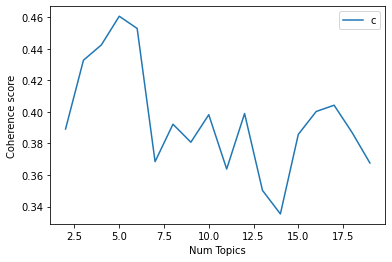

In [71]:
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

From the above graph we can clearly see that topic number=5 has the highest coherence score.

In [72]:
# Print the coherence scores for various 
for m, cv in zip(x, coherence_values):
    print("Number Of Topics =", m, " has Coherence Value of", round(cv, 4))

Number Of Topics = 2  has Coherence Value of 0.3891
Number Of Topics = 3  has Coherence Value of 0.4328
Number Of Topics = 4  has Coherence Value of 0.4425
Number Of Topics = 5  has Coherence Value of 0.4607
Number Of Topics = 6  has Coherence Value of 0.4529
Number Of Topics = 7  has Coherence Value of 0.3685
Number Of Topics = 8  has Coherence Value of 0.3922
Number Of Topics = 9  has Coherence Value of 0.3808
Number Of Topics = 10  has Coherence Value of 0.3982
Number Of Topics = 11  has Coherence Value of 0.3638
Number Of Topics = 12  has Coherence Value of 0.399
Number Of Topics = 13  has Coherence Value of 0.3502
Number Of Topics = 14  has Coherence Value of 0.3353
Number Of Topics = 15  has Coherence Value of 0.3857
Number Of Topics = 16  has Coherence Value of 0.4003
Number Of Topics = 17  has Coherence Value of 0.4042
Number Of Topics = 18  has Coherence Value of 0.387
Number Of Topics = 19  has Coherence Value of 0.3676


Number of topics=5 has the higest coherence score of 0.4607.

In [77]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.022*"music" + 0.015*"people" + 0.014*"mobile" + 0.012*"phone" + 0.011*"service" + 0.011*"new" + 0.011*"technology" + 0.010*"consumer" + 0.009*"network" + 0.008*"firm"'),
 (1,
  '0.028*"game" + 0.011*"search" + 0.011*"year" + 0.010*"people" + 0.009*"technology" + 0.008*"gadget" + 0.008*"device" + 0.007*"console" + 0.006*"market" + 0.006*"user"'),
 (2,
  '0.015*"people" + 0.013*"software" + 0.010*"computer" + 0.010*"new" + 0.009*"service" + 0.009*"year" + 0.008*"firm" + 0.008*"system" + 0.008*"pc" + 0.007*"company"'),
 (3,
  '0.015*"people" + 0.014*"phone" + 0.010*"mobile" + 0.010*"technology" + 0.010*"year" + 0.009*"game" + 0.008*"time" + 0.008*"player" + 0.007*"way" + 0.006*"user"'),
 (4,
  '0.014*"email" + 0.014*"people" + 0.010*"virus" + 0.010*"attack" + 0.009*"spam" + 0.009*"site" + 0.009*"firm" + 0.008*"user" + 0.008*"net" + 0.007*"service"')]

In [78]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.027977  0.042235       1        1  28.708700
4      0.101619 -0.031520       2        1  24.685851
3     -0.021266 -0.021608       3        1  20.588895
0     -0.035334  0.062583       4        1  14.935154
1     -0.072995 -0.051690       5        1  11.081399, topic_info=          Term         Freq        Total Category  logprob  loglift
2959      game  1432.000000  1432.000000  Default  30.0000  30.0000
108      music  1266.000000  1266.000000  Default  29.0000  29.0000
326     mobile  1157.000000  1157.000000  Default  28.0000  28.0000
3908     email   855.000000   855.000000  Default  27.0000  27.0000
10001     spam   505.000000   505.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
286     number    98.732871   886.564412   Topic5  -5.4881   0.0050
12     company   103.176239  1128.218278   Topic5  -5.4441  -0.1921
1787        pc    95.928666   902.352824   Topic5  -5.5169  -0.0415
64         big    88.672111   638.068857   Topic5  -5.5956   0.2264
2587   content    87.375550   628.089109   Topic5  -5.6103   0.2274

[443 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
4409       5  0.741109  18month
10970      4  0.951498      70p
1258       1  0.236003     able
1258       2  0.199038     able
1258       3  0.358269     able
...      ...       ...      ...
203        4  0.128126     year
203        5  0.154226     year
1202       2  0.106420   yearly
1202       4  0.851358   yearly
10023      2  0.943462     zafi

[1051 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 1, 2])

In [ ]:
lemmatize(data)

'yukos unit buyer face loan claim owner embattled russian oil giant yukos ask buyer former production unit pay back 900m £479m loan stateowned rosneft bought yugansk unit 93bn sale forced russia part settle 275bn tax claim yukos yukos owner menatep group say ask rosneft repay loan yugansk secured asset rosneft already face similar 540m repayment demand foreign bank legal expert said rosnefts purchase yugansk would include obligation the pledged asset rosneft pay real money creditor avoid seizure yugansk asset said moscowbased u lawyer jamie firestone connected case menatep group managing director tim osborne told reuters news agency if default fight rule law exists international arbitration clause credit rosneft official unavailable comment company said intends take action menatep recover tax claim debt owed yugansk yukos filed bankruptcy protection u court attempt prevent forced sale main production arm sale went ahead december yugansk sold littleknown shell company turn bought rosnef

In [ ]:
data.head()

,Texts,Number of sentences,Number of words,Number of Complex words,Average Length of sentence
0,yukos unit buyer face loan claim owner embattl...,12,161,116,13
1,ad sale boost time warner profit quarterly pro...,20,258,190,12
2,dollar gain greenspan speech dollar hit highes...,15,234,170,15
3,u trade gap hit record 2004 gap u export impor...,14,206,138,14
4,high fuel price hit ba profit british airway b...,19,269,173,14


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

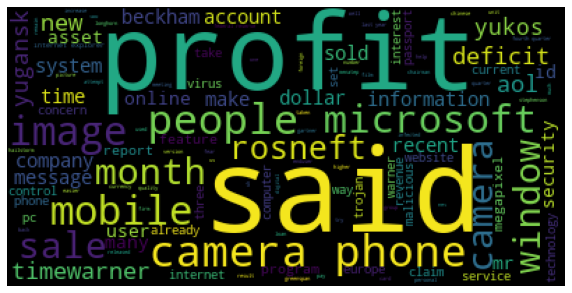

<Figure size 360x216 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
text = data['Texts'].values 
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(5,3))
plt.show()


In [ ]:
def words_count(data):
  count = []
  word = [] 
  all_words = ' '.join(data['Texts']).split()
  for i in set(all_words):
    word.append(i)
    count.append(all_words.count(i))
  word_count_df = pd.DataFrame({'Words': word,'Count':count},columns=['Words','Count']).sort_values(by='Count', ascending=False)
  return word_count_df

In [ ]:
word_count = words_count(data)
word_count[0:20]

,Words,Count
16285,said,7253
14361,mr,3045
13257,year,2830
8912,would,2577
13837,also,2156
15428,people,2044
8959,new,1970
14925,u,1910
20785,one,1809
3907,could,1510


In [ ]:
import plotly.express as px
px.bar(word_count[0:50],x = 'Words',y= 'Count')

(0.0, 1000.0)

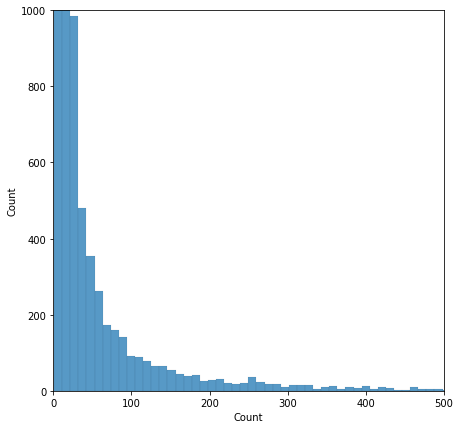

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(word_count['Count'],bins=700)
plt.xlim((0,500))
plt.ylim((0,1000))

(0.0, 10.0)

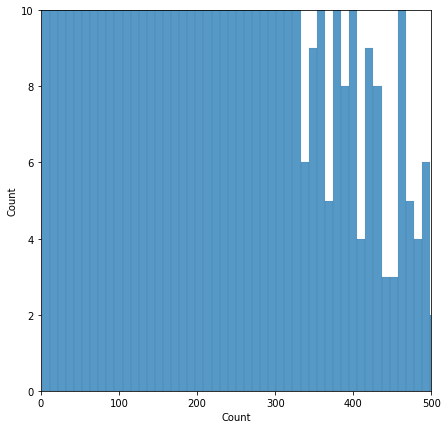

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(word_count['Count'],bins=700)
plt.xlim((0,500))
plt.ylim((0,10))

In [ ]:
vectors = CountVectorizer(max_features=7000)
document_term_matrix = vectors.fit_transform(data['Texts'])

In [ ]:
document_term_matrix.shape

(2225, 7000)

In [ ]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -801585.1266306704
